# 两种评价指标
## (1) MRR: Mean Reciprocal Rank
  Reciprocal rank是指第一个正确答案的排名的倒数。MRR是指多个查询语句的排名倒数的均值。公式如下：
      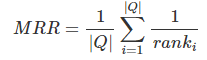
  MRR假设每一个Query只有一个最标准的答案（每一个repo只有一个最匹配的team），与我们的问题不太一致，因此我根据NDCG对MRR做了一些改变。
## (2) NDCG: Normalized Discounted Cumulative Gain
### Cumulative Gain(CG)：
  表示前p个位置累计得到的效益，公式如下：
  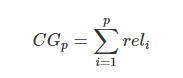
  这里我取rel_i为1和0，分别表示推荐得到的team事实上有或没有参与该repo。
### Discounted cumulative gain(DCG)：
   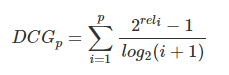
   按排序给每个位置上的相关度加上了权重。由于rel_i取值{0,1}，分子的值也分别对应0和1。
### Ideal DCG(IDCG)：
   IDCG是理想情况下的DCG，即对于一个查询语句和p来说，DCG的最大值。公式如下： 
   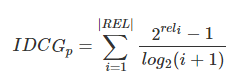
   对于我们的实验来说，IDCG就是所有参与了当前repo的team都被推荐到列表最前列时计算出的DCG值。
### Normalized DCG(nDCG)：
   由于每个查询语句所能检索到的结果文档集合长度不一，p值的不同会对DCG的计算有较大的影响。所以不能对不同查询语句的DCG进行求平均，需要进行归一化处理。nDCG就是用IDCG进行归一化处理，表示当前DCG比IDCG还差多大的距离。公式如下：
   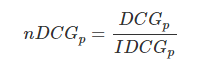

In [1]:
import pandas as pd
import json

recommendations = {}
with open('recommend_euclidean.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(t) for t in line[1:]]
        recommendations[repo] = recs
        
team_target = {}
with open('team_profiles.json') as tj:
    for tl in tj.readlines():
        line = tl.split('\t')
        team = line[0]
        profile = json.loads(line[1])
        team_target[team] = profile['target']
print(list(team_target.items())[0])
print(list(recommendations.items())[0])

('["AMorporkian", "kharidiron"]', 'Starbound-Dev/starbound-dev')
('Starbound-Dev/starbound-dev', ['["joseph-ortiz", "tacksoo"]', '["SimonGoring", "andydawson", "IceAgeEcologist"]', '["pkoro", "skanct", "themiszamani", "dpavlos", "kkoumantaros"]', '["IgorDePaula", "flavianohonorato"]', '["Thooms", "flavray", "florent1933", "AntoineGirard", "Walz", "Wonskcalb", "Alterrien", "jordankevi"]', '["dethe", "eddieantonio", "JarrettSpiker", "CelticMinstrel", "amaclean199", "kotarCreative"]', '["bsyu1125", "oeon"]', '["weaverbel", "ndalyrose", "evanwill", "alexandermendes", "kekoziar", "elizabethwilliams8"]', '["HazCod", "danielfarrell", "shatran", "thephw"]', '["only-a-ptr", "AnotherFoxGuy", "mikadou"]', '["avernet", "ebruchez", "ajw625"]', '["mxplusb", "seviet", "kartiklunkad26", "doddatpivotal"]', '["sux13", "elmerehbi"]', '["Jan0707", "jferiante"]', '["ivanbarlog", "RamonSmit"]', '["jungor", "williamking", "WarpPrism", "lucifan"]', '["54017", "dengal3"]', '["jayjiahua", "BillBillBillBill", "d

In [2]:
import numpy as np
def NDCG(repo,rec,team_target):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in team_target and repo == team_target[tm]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in team_target:
        target = team_target[tm]
        if target == repo:
            target_cnt += 1
            idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

item = list(recommendations.items())[0]
print(NDCG(item[0],item[1],team_target))

0.0


In [3]:
from matplotlib import pyplot as plt

NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Euclidean Distance Based Recommendation")
plt.savefig('evaluate_euclidean.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

<Figure size 640x480 with 1 Axes>

0.0 1.0


In [4]:
recommendations = {}
with open('recommend_svd.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(t)[1] for t in line[1:]]
        recommendations[repo] = recs

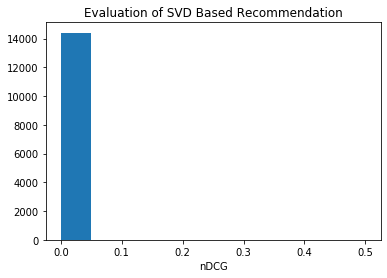

0.0 0.5


In [5]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of SVD Based Recommendation")
plt.savefig('evaluate_svd.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [6]:
recommendations = {}
with open('recommend_random_walk_sim.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(l)[0] for l in line[1:]]
        recommendations[repo] = recs

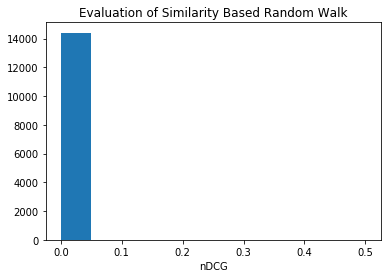

0.0 0.5


In [7]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Similarity Based Random Walk")
plt.savefig('evaluate_sim.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [8]:
recommendations = {}
with open('recommend_random_walk_ref.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(l)[0] for l in line[1:]]
        recommendations[repo] = recs

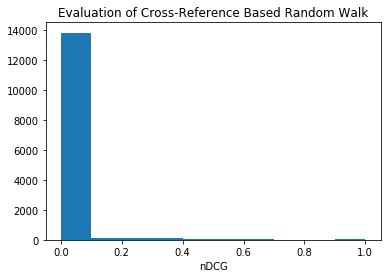

0.0 1.0


In [9]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Cross-Reference Based Random Walk")
plt.savefig('evaluate_ref.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [10]:
recommendations = {}
with open('recommend_random_walk_social.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(l)[0] for l in line[1:]]
        recommendations[repo] = recs

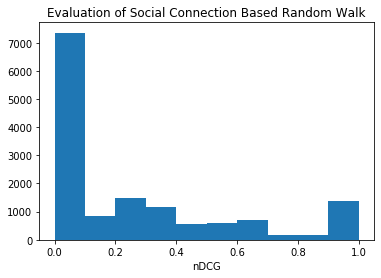

0.0 1.0


In [11]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Social Connection Based Random Walk")
plt.savefig('evaluate_social.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))

In [12]:
recommendations = {}
with open('recommend_random_walk.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(l)[0] for l in line[1:]]
        recommendations[repo] = recs

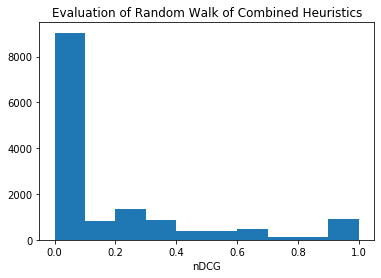

0.0 1.0


In [13]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Random Walk of Combined Heuristics")
plt.savefig('evaluate_rw.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))